In [2]:
!nvidia-smi



Sun Aug 18 16:19:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


/content
100% 6.23M/6.23M [00:00<00:00, 171MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 68.7MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 88.8ms
Speed: 14.1ms preprocess, 88.8ms inference, 760.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


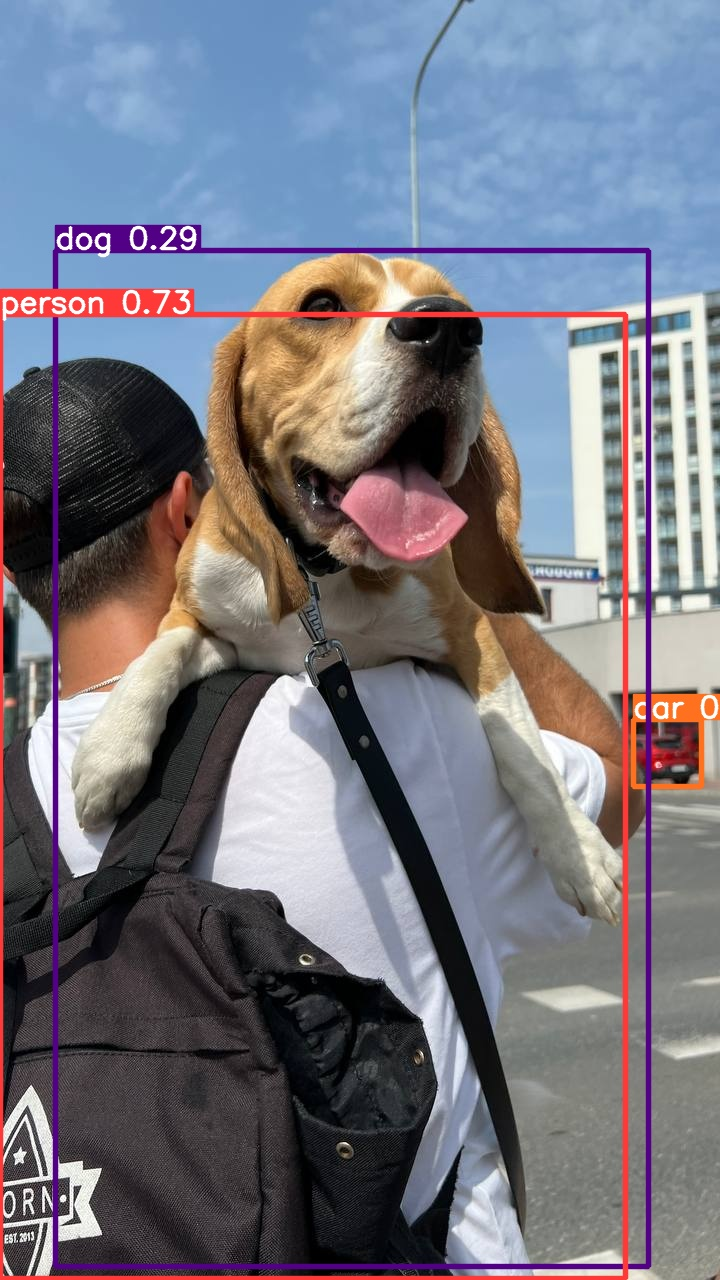

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 77.7ms
Speed: 2.0ms preprocess, 77.7ms inference, 614.8ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy


tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
results[0].boxes.conf


tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [11]:
results[0].boxes.cls


tensor([ 0., 16.,  2.], device='cuda:0')

In [12]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="G7lORhKLu1ZtCIIok9wU")
project = rf.workspace("robo-mgah0").project("catanddogobjectdetectionyolov8")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CatAndDogObjectDetectionYolov8-1 in yolov8:: 100%|██████████| 325/325 [00:00<00:00, 5733.10it/s]


In [13]:

!yolo task=detect mode=train model=yolov8s.pt data=/content/CatAndDogObjectDetectionYolov8-1/data.yaml epochs=25 imgsz=800 plots=True


100% 21.5M/21.5M [00:00<00:00, 128MB/s]
New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/CatAndDogObjectDetectionYolov8-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_b

In [16]:
!ls runs/detect/train

args.yaml					    P_curve.png		train_batch136.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch137.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1723998109.25bac4176707.1253.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch135.jpg	weights


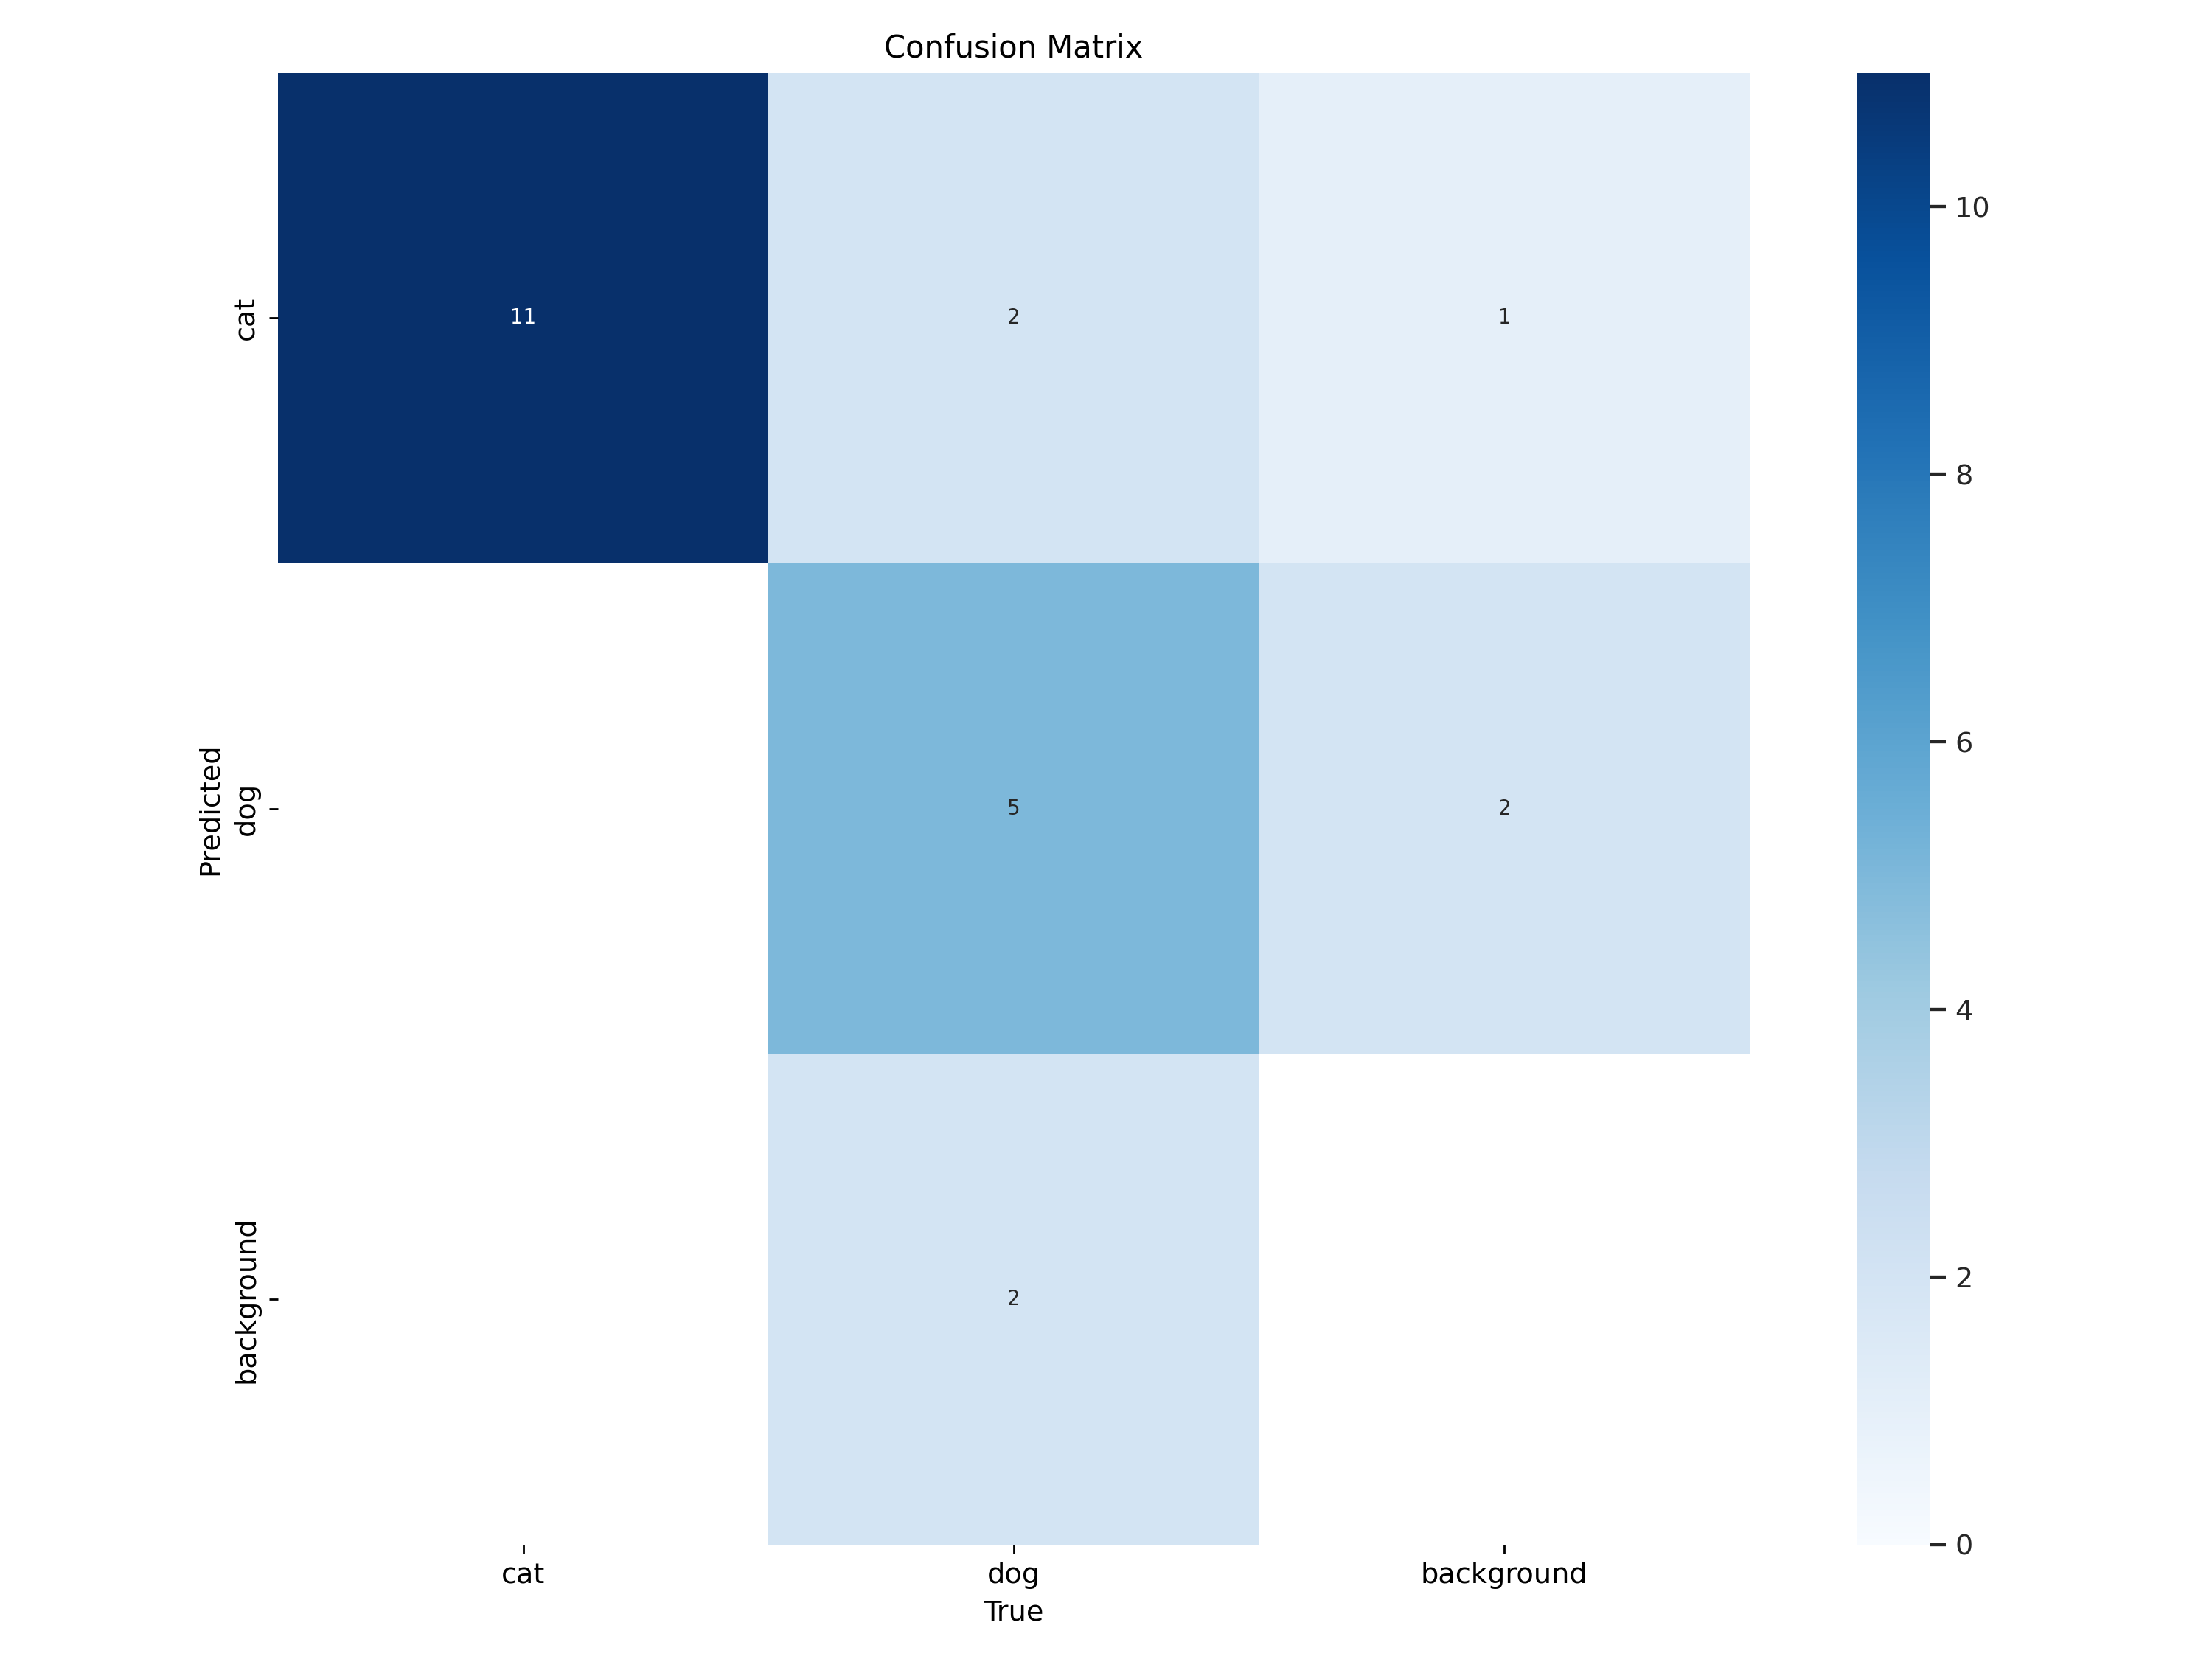

In [17]:
from IPython.display import Image, display

# Path to the confusion matrix image
image_path = 'runs/detect/train/confusion_matrix.png'

# Display the image
display(Image(filename=image_path, width=600))


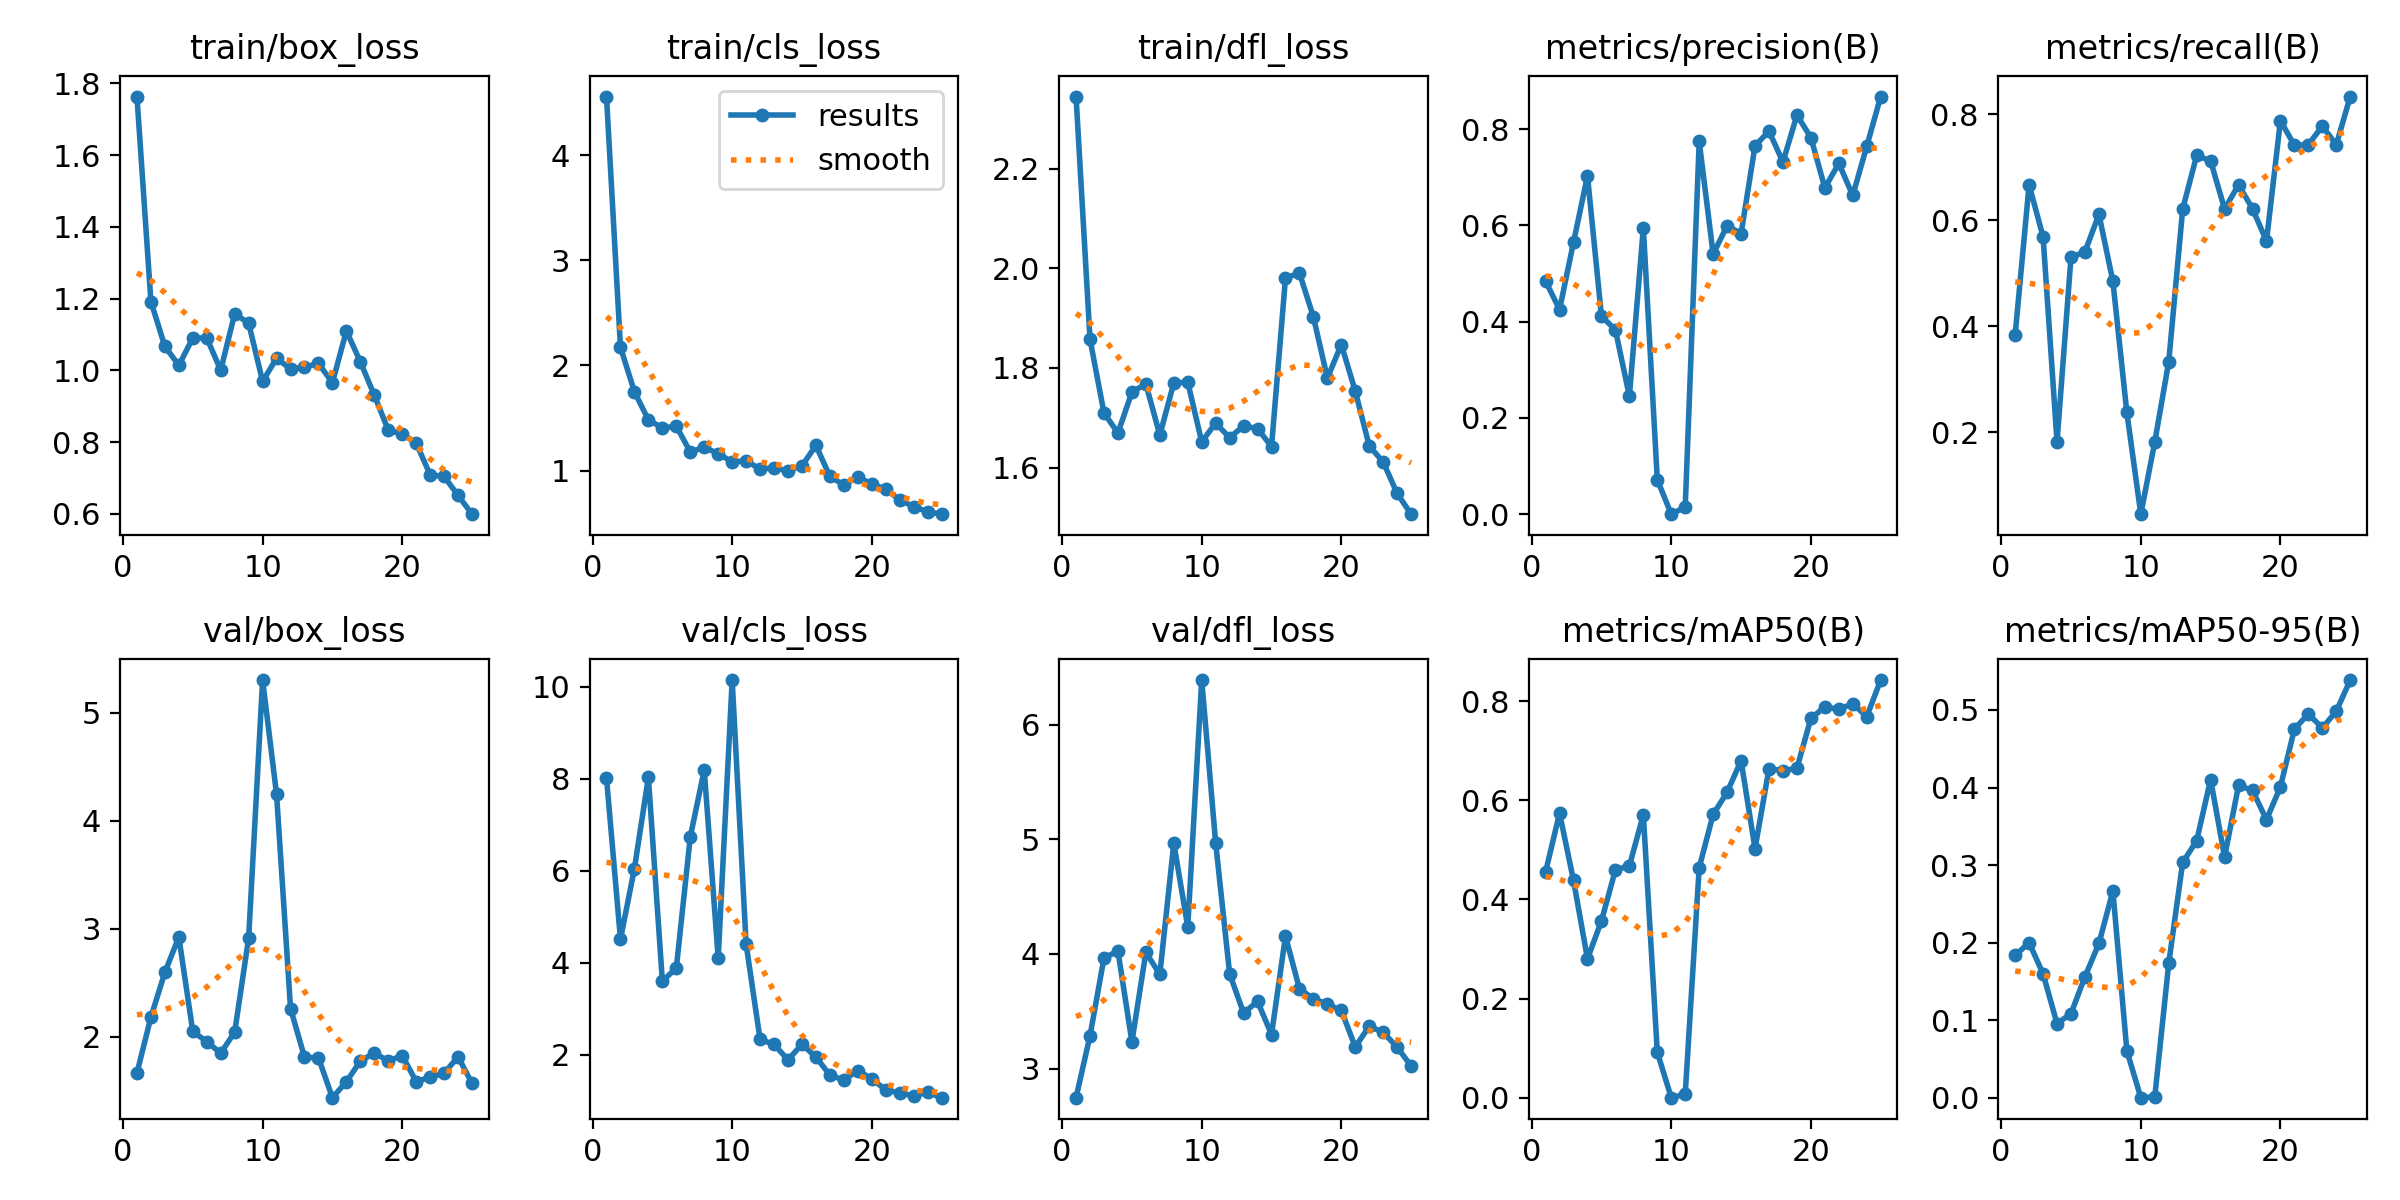

In [18]:

Image(filename='/content/runs/detect/train/results.png', width=600)

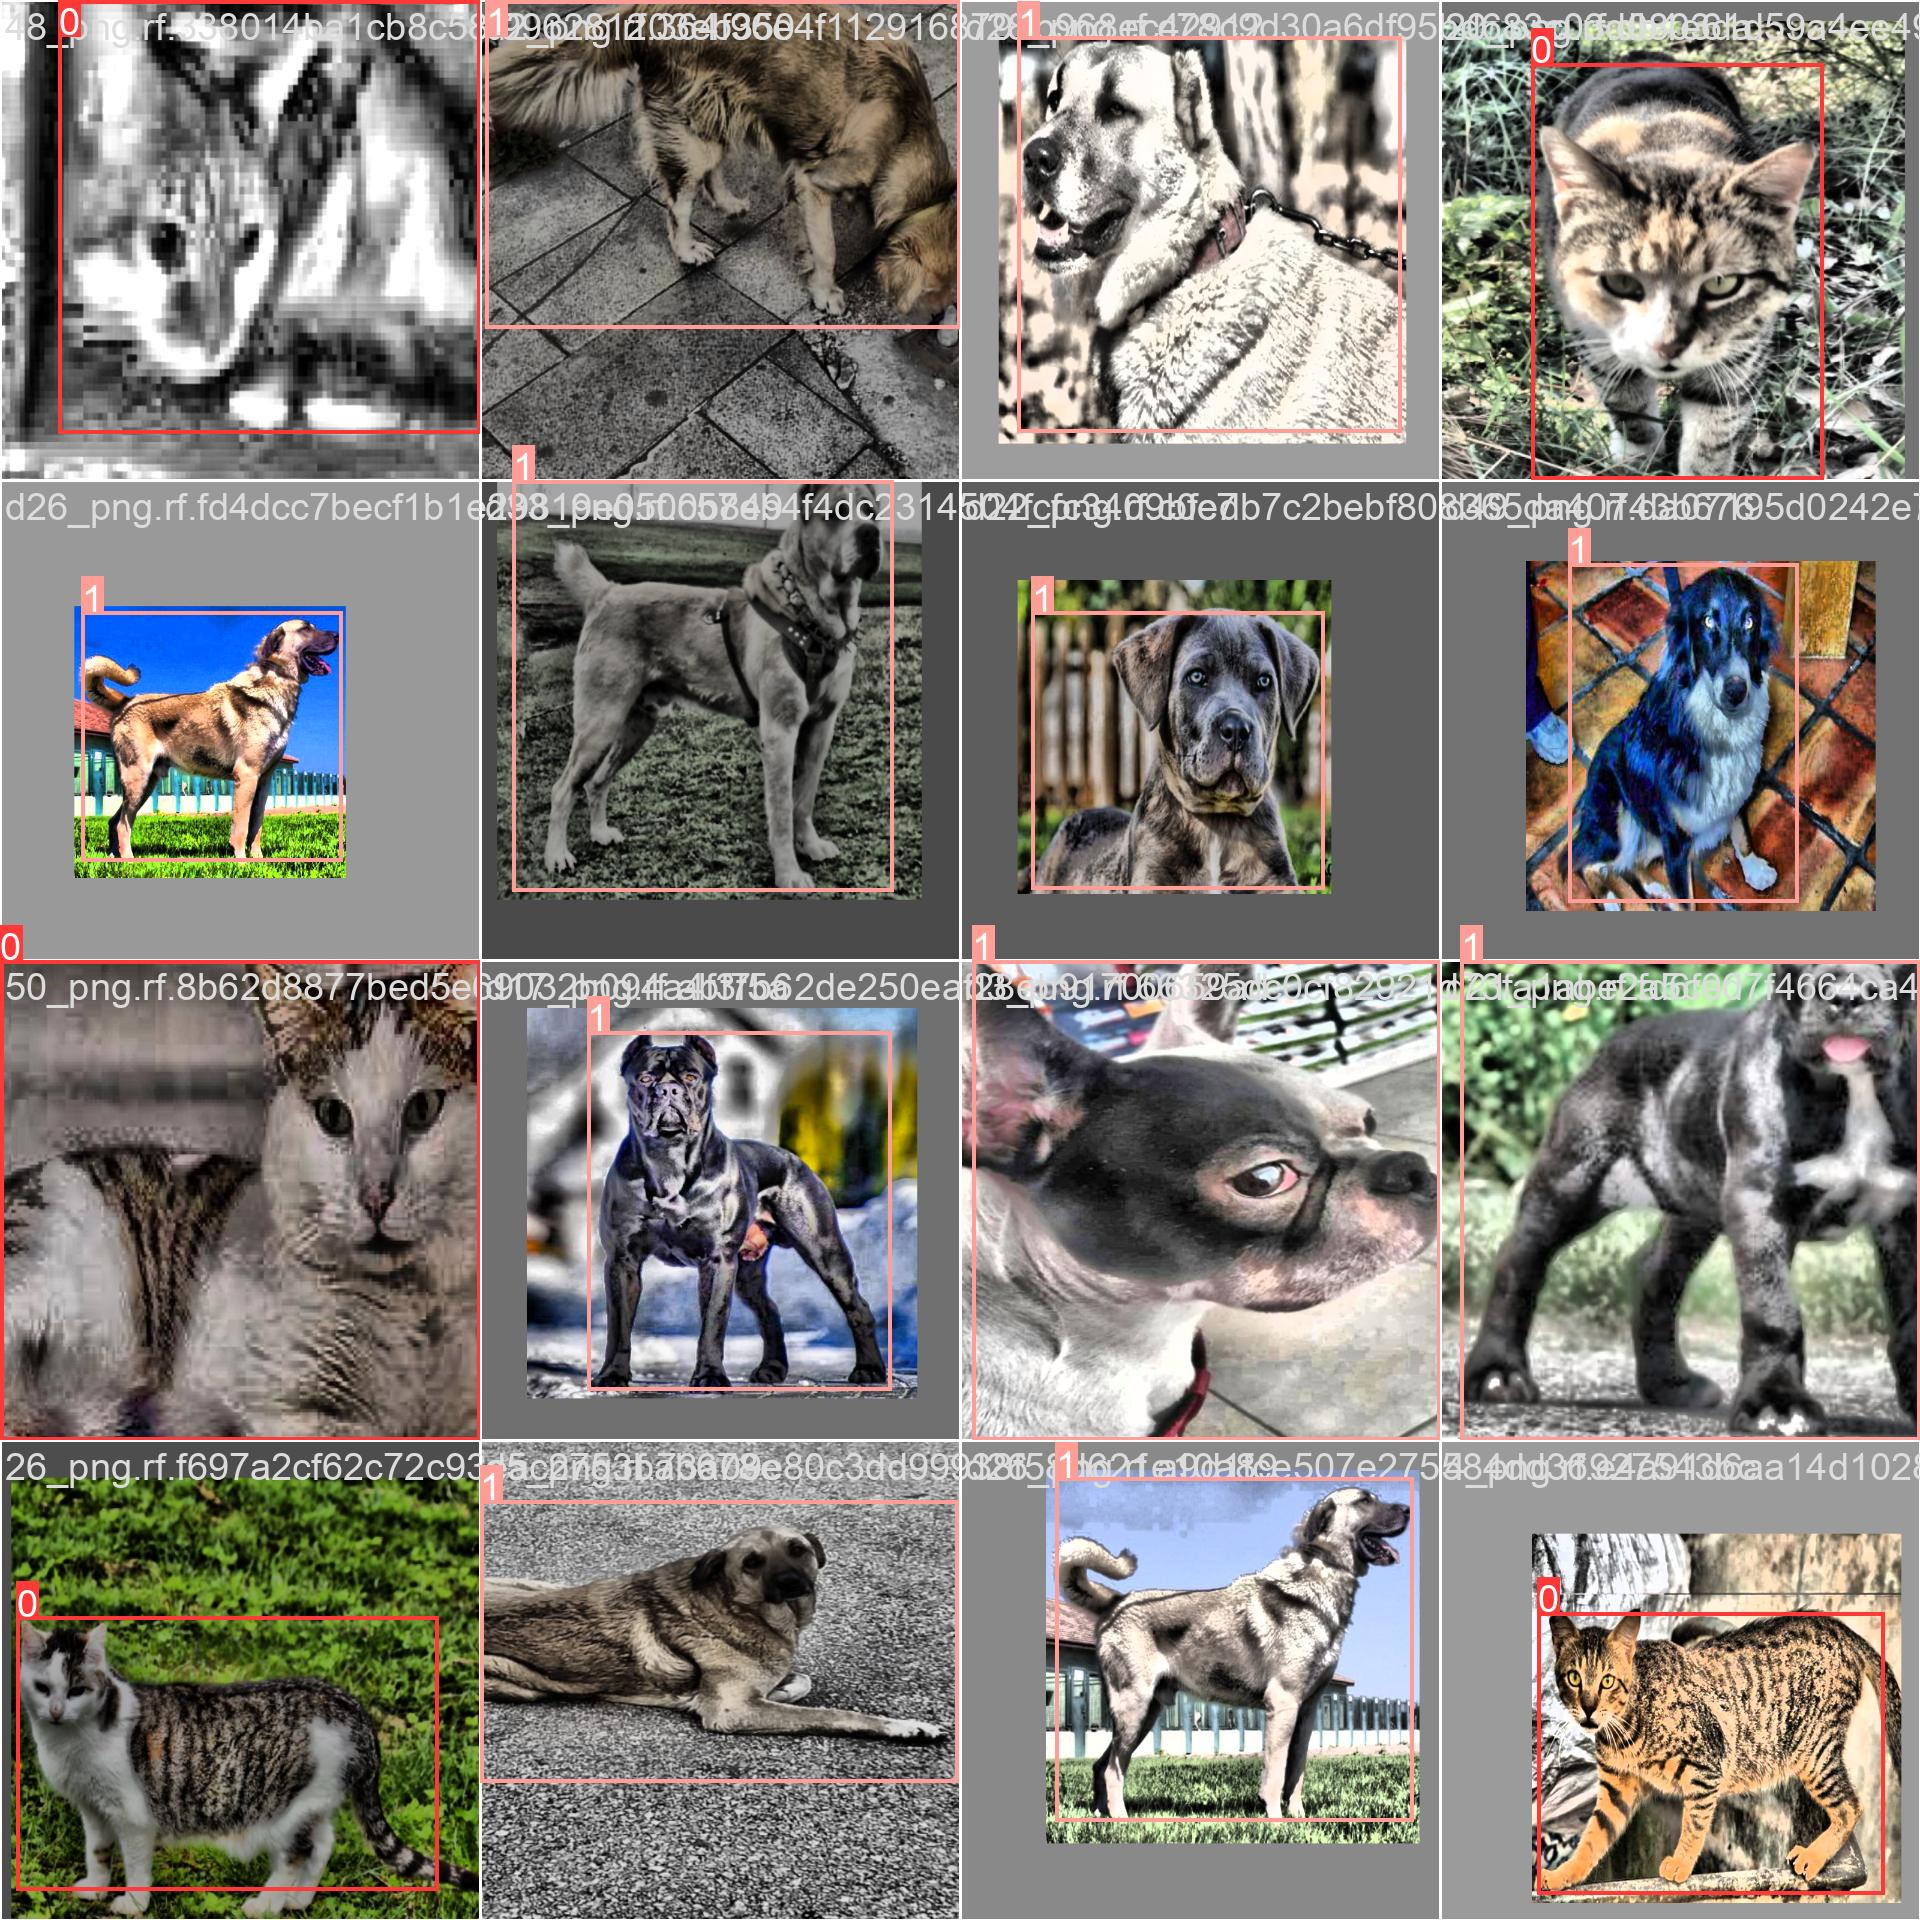

In [19]:
Image(filename='/content/runs/detect/train/train_batch135.jpg', width=600)


In [20]:


# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to your trained model

# Display the class names
print(model.names)


{0: 'cat', 1: 'dog'}


In [21]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/CatAndDogObjectDetectionYolov8-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.04s/it]
                   all         20         20      0.869      0.833      0.842      0.539
                   cat         20         11      0.897          1      0.972      0.536
                   dog         20          9       0.84      0.667      0.712      0.543
Speed: 0.4ms preprocess, 35.9ms inference, 0.0ms loss, 38.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val



0: 512x800 1 dog, 17.0ms
Speed: 3.8ms preprocess, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 800)


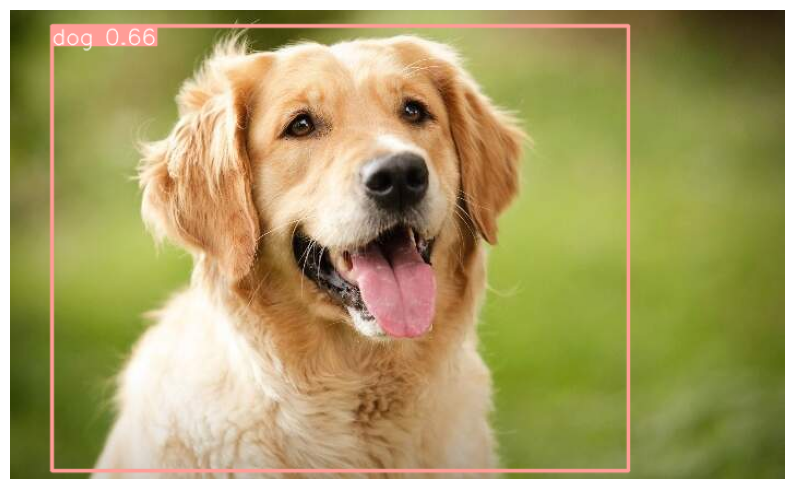

In [26]:
# Step 1: Install ultralytics (if not already installed)
!pip install ultralytics

# Step 2: Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Step 3: Load the trained YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to your trained YOLOv8del

# Step 4: Load an input image
image_path = '/content/golden-retriever-tongue-out.jpg'  # Replace with your image path
img = cv2.imread(image_path)

# Step 5: Perform inference
results = model(img)

# Step 6: Extract bounding box information and labels
# YOLOv8 provides a convenient `plot` method for visualizing results directly.

# Visualize the results
annotated_frame = results[0].plot()

# Step 7: Convert the image from BGR (OpenCV default) to RGB for display
annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Step 8: Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()



0: 544x800 1 cat, 19.1ms
Speed: 3.4ms preprocess, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 800)


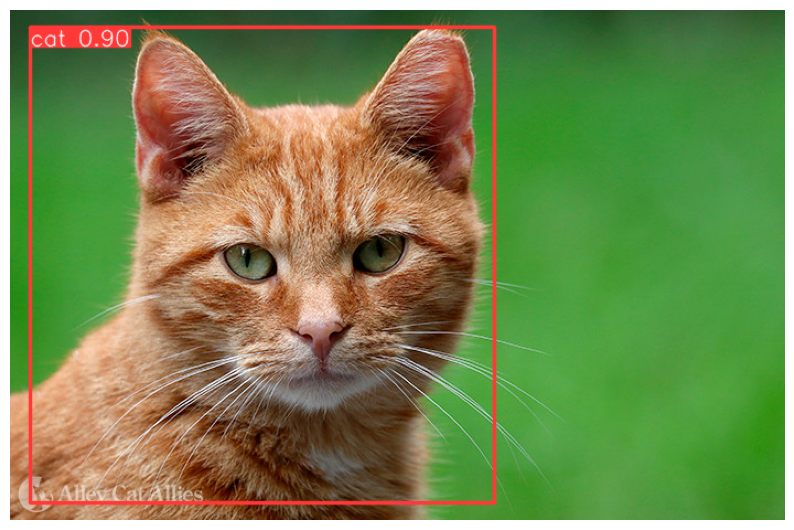

In [27]:
# Step 1: Install ultralytics (if not already installed)
!pip install ultralytics

# Step 2: Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Step 3: Load the trained YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to your trained YOLOv8del

# Step 4: Load an input image
image_path = '/content/FELV-cat.jpg'  # Replace with your image path
img = cv2.imread(image_path)

# Step 5: Perform inference
results = model(img)

# Step 6: Extract bounding box information and labels
# YOLOv8 provides a convenient `plot` method for visualizing results directly.

# Visualize the results
annotated_frame = results[0].plot()

# Step 7: Convert the image from BGR (OpenCV default) to RGB for display
annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Step 8: Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()


In [28]:
# Step 1: Compress the trained model weights into a ZIP file
!zip -r /content/best_model.zip /content/runs/detect/train/weights/best.pt

# Step 2: Download the ZIP file to your local machine
from google.colab import files
files.download('/content/best_model.zip')


  adding: content/runs/detect/train/weights/best.pt (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>